**Seeding for reproducibility**

In [2]:
!pip install numpy==1.26.3
!pip install streamlit==1.30.0
!pip install tensorflow==2.15.0.post1

In [3]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

**Importing the dependencies**

In [4]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

**Data Curation**

Upload the kaggle.json file

In [5]:
!pip install kaggle

In [6]:
kaggle_credentails = json.load(open("kaggle.json"))

In [7]:
# setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [8]:
!kaggle datasets download -d ashishmotwani/tomato

Dataset URL: https://www.kaggle.com/datasets/ashishmotwani/tomato
License(s): copyright-authors
tomato.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
!ls

kaggle.json  sample_data  tomato.zip  train  valid


In [10]:
# Unzip the downloaded dataset
with ZipFile("tomato.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [11]:
print(os.listdir("train"))


print(len(os.listdir("train")))


['Bacterial_spot', 'Tomato_mosaic_virus', 'healthy', 'Early_blight', 'Late_blight', 'Leaf_Mold', 'Target_Spot', 'powdery_mildew', 'Tomato_Yellow_Leaf_Curl_Virus', 'Septoria_leaf_spot', 'Spider_mites Two-spotted_spider_mite']
11


**Number of Classes = 11**




In [12]:
print(len(os.listdir("train/Bacterial_spot")))
print(os.listdir("train/Bacterial_spot")[:5])

2826
['91592d84-fcea-49ca-a09a-752c12b4d3fe___GCREC_Bact.Sp 3093.JPG', '6b30245b-6c88-4cdb-b170-96bcba1212c4___UF.GRC_BS_Lab Leaf 8765.JPG', 'BS_(301).jpg', '160c389d-886b-433a-a18b-842c45b2f20c___GCREC_Bact.Sp 5743.JPG', '3a5a5fef-8a3a-4f70-ab85-eaf5e3ecf6f2___GCREC_Bact.Sp 3449.JPG']


**Data Preprocessing**

In [13]:
# Dataset Path
base_dir = 'train'

(256, 256, 3)


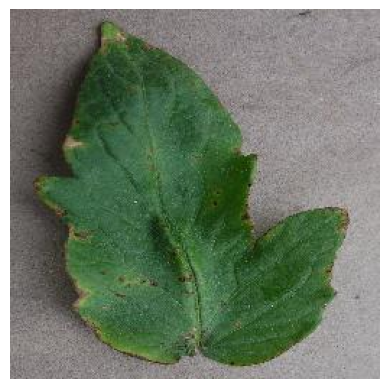

In [14]:
image_path = '/content/train/Bacterial_spot/0045ba29-ed1b-43b4-afde-719cc7adefdb___GCREC_Bact.Sp 6254.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [15]:
image_path = '/content/train/Bacterial_spot/0045ba29-ed1b-43b4-afde-719cc7adefdb___GCREC_Bact.Sp 6254.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img)

[[[110 100  99]
  [103  93  92]
  [112 102 101]
  ...
  [150 144 146]
  [149 143 145]
  [146 140 142]]

 [[126 116 115]
  [117 107 106]
  [121 111 110]
  ...
  [154 148 150]
  [148 142 144]
  [144 138 140]]

 [[114 104 103]
  [110 100  99]
  [122 112 111]
  ...
  [154 148 150]
  [148 142 144]
  [146 140 142]]

 ...

 [[124 118 118]
  [146 140 140]
  [136 130 130]
  ...
  [167 165 166]
  [170 168 169]
  [164 162 163]]

 [[135 129 129]
  [124 118 118]
  [149 143 143]
  ...
  [161 159 160]
  [161 159 160]
  [169 167 168]]

 [[134 128 128]
  [153 147 147]
  [142 136 136]
  ...
  [156 154 155]
  [156 154 155]
  [174 172 173]]]


In [16]:
# Image Parameters
img_size = 224
batch_size = 32

**Train Test Split**

In [17]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

In [18]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 20686 images belonging to 11 classes.


In [19]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 5165 images belonging to 11 classes.


**Convolutional Neural Network**

In [20]:
# Model Definition
model = models.Sequential()

# First Conv Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

# Second Conv Layer with 64 filters
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

# Third Conv Layer with 64 filters
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

# Fourth Conv Layer with 64 filters
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

# Flatten and Dense Layers
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

In [21]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0

In [22]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Model training**

In [36]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=5,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

Epoch 1/5
646/646 [==============================] - 1532s 2s/step - loss: 1.3378 - accuracy: 0.5251 - val_loss: 0.7833 - val_accuracy: 0.7310
Epoch 2/5
646/646 [==============================] - 1550s 2s/step - loss: 0.7378 - accuracy: 0.7414 - val_loss: 0.5953 - val_accuracy: 0.7981
Epoch 3/5
646/646 [==============================] - 1533s 2s/step - loss: 0.5282 - accuracy: 0.8126 - val_loss: 0.6026 - val_accuracy: 0.8104
Epoch 4/5
646/646 [==============================] - 1507s 2s/step - loss: 0.3926 - accuracy: 0.8641 - val_loss: 0.4925 - val_accuracy: 0.8509
Epoch 5/5
646/646 [==============================] - 1518s 2s/step - loss: 0.2843 - accuracy: 0.9051 - val_loss: 0.4718 - val_accuracy: 0.8602


**Model Evaluation**

In [33]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
161/161 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - accuracy: 0.8700 - loss: 0.5648
Validation Accuracy: 87.00%


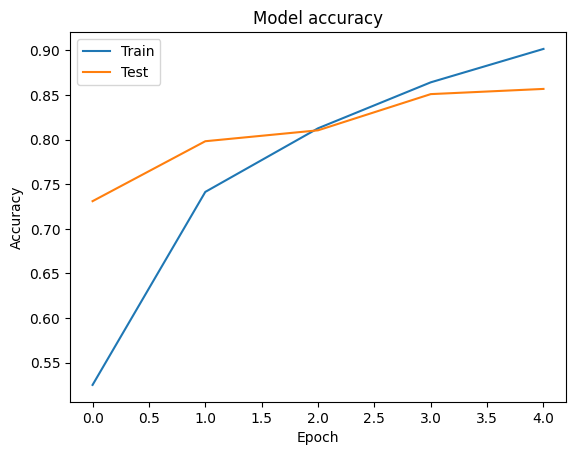

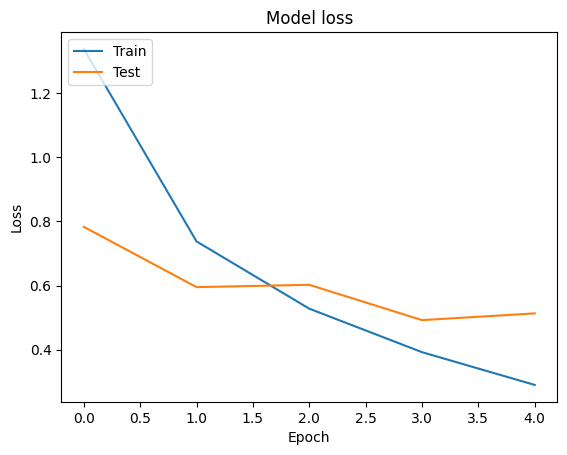

In [25]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Building a Predictive System**

In [26]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [27]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [28]:
class_indices

{0: 'Bacterial_spot',
 1: 'Early_blight',
 2: 'Late_blight',
 3: 'Leaf_Mold',
 4: 'Septoria_leaf_spot',
 5: 'Spider_mites Two-spotted_spider_mite',
 6: 'Target_Spot',
 7: 'Tomato_Yellow_Leaf_Curl_Virus',
 8: 'Tomato_mosaic_virus',
 9: 'healthy',
 10: 'powdery_mildew'}

In [29]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [30]:
# Example Usage
image_path = '/content/train/Late_blight/0003faa8-4b27-4c65-bf42-6d9e352ca1a5___RS_Late.B 4946.JPG'
#image_path = ''
#image_path = ''
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 [==============================] - 0s 116ms/step
Predicted Class Name: Late_blight


**Save the model to Google drive or local**

In [31]:
model.save('drive/MyDrive/Youtube/trained_models/plant_disease_prediction_model.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [32]:
model.save('plant_disease_prediction_model.h5')